## Loan Application Status  

#### Project Description 


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


TARGET--

predict whether the loan of the applicant wiil be approved or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load dataset
loan=pd.read_csv('loan_prediction.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
395,LP002272,Male,Yes,2,Graduate,No,3276,484.0,135.0,360.0,NaN,Semiurban,Y
379,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y
287,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
181,LP001634,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural,N


### Data preprocessing 

In [4]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan.duplicated().sum()

0

<Axes: >

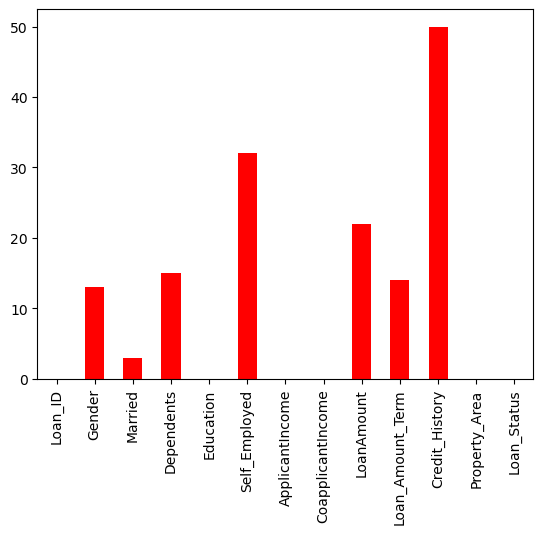

In [8]:
loan.isnull().sum().plot(kind='bar',color = 'red')

1.We can see there are total 13 columns including target variable, all of them are self explanatory.

2.We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns.

In [9]:
# Handling missing values
loan['Dependents']=loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Gender']=loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married']=loan['Married'].fillna(loan['Married'].mode()[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

In [10]:
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mean())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())

In [11]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='Loan_Status'>

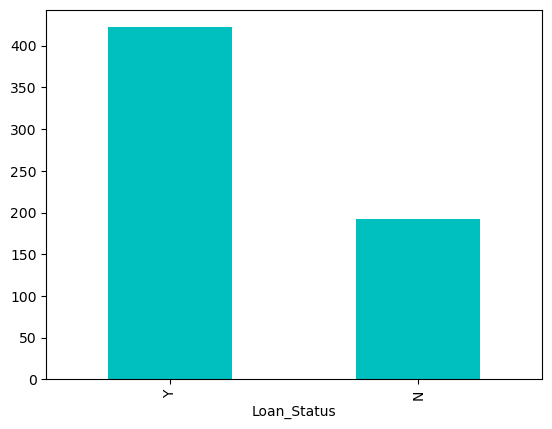

In [12]:
#Counting all unique values of column "Loan_Status" from dataset 

loan["Loan_Status"].value_counts().plot(kind='bar',color='c')

1.Loan_Status(Y) = 422

2.Loan_Status(N)=192

In [13]:
loan = loan.drop(columns=['Loan_ID']) 

In [14]:
# Categorical

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


print("Categorical Columns in training dataset based on datatypes {}".format(categorical_columns))

Categorical Columns in training dataset based on datatypes ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']


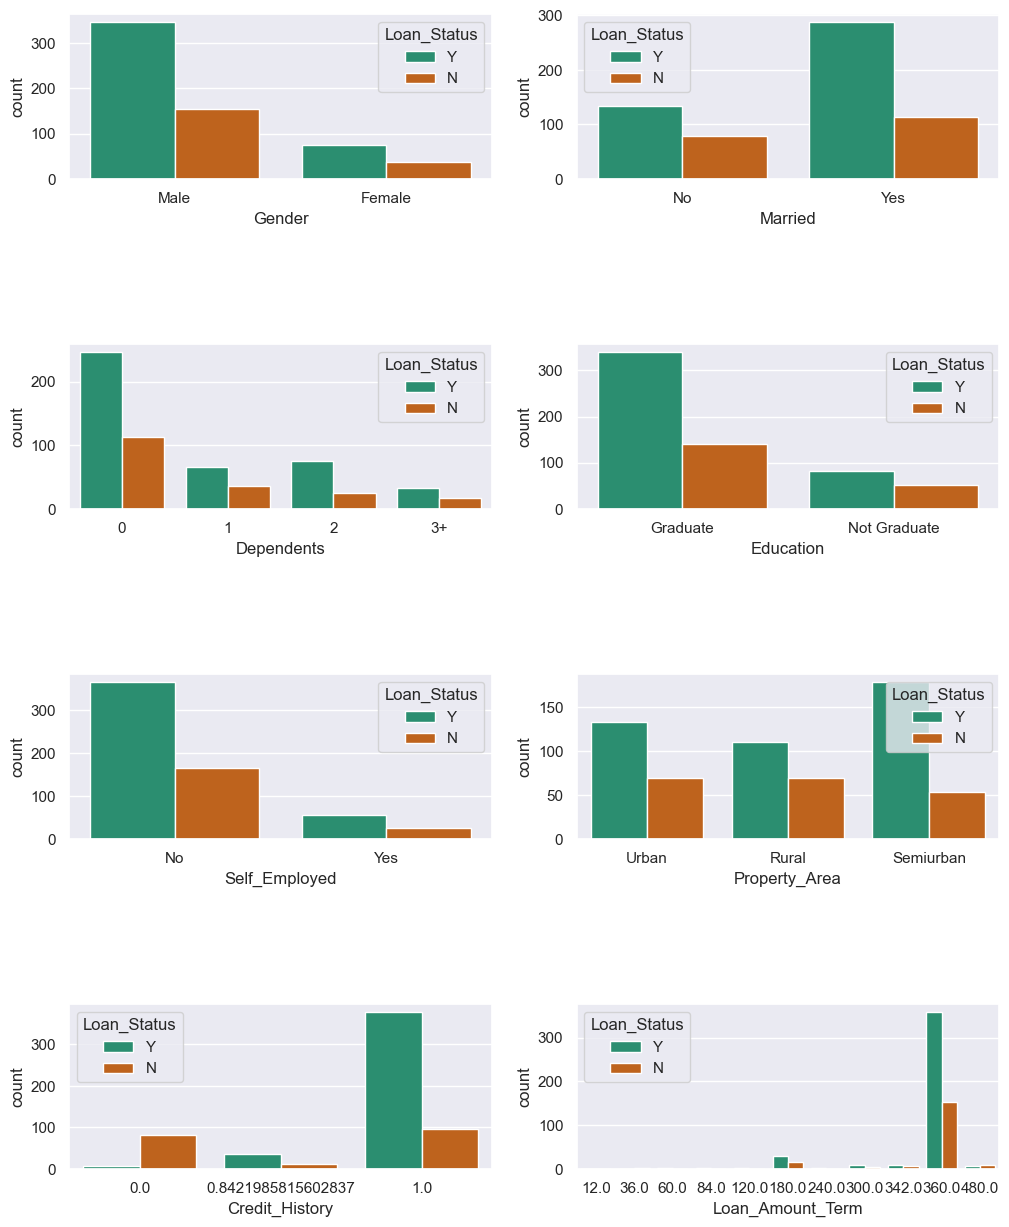

In [15]:
# Data Visualization libraries

sns.set_theme(style="darkgrid")
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan,hue='Loan_Status',ax=axes[row,col],palette="Dark2")

plt.subplots_adjust(hspace=1)



OBSERVATIONS ...

Loan Approval Status: About 2/3rd of applicants have been granted loan.

Sex: There are more Men than Women (approx. 3x).

Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.

Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval.

Employment: 5/6th of population is not self employed.

Property Area: More applicants from Semi-urban and also likely to be granted loans.

Applicant with credit history are far more likely to be accepted.

Loan Amount Term: Majority of the loans taken are for 360 Months (30 years)



In [16]:
# NUmerical

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print("Numerical Columns in training dataset based on datatypes {}".format(numerical_columns))      

Numerical Columns in training dataset based on datatypes ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


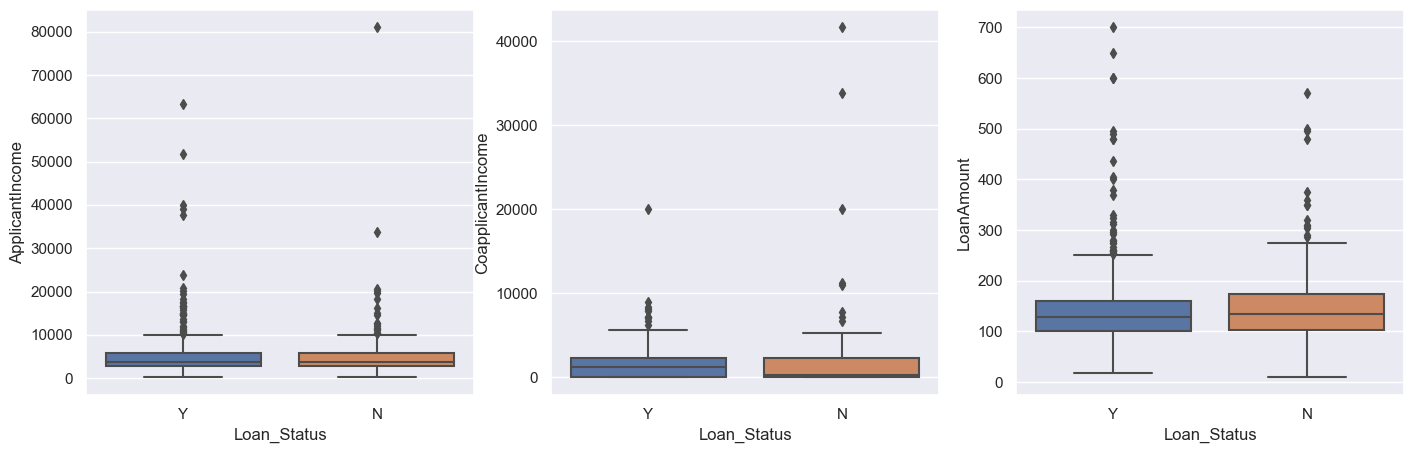

In [17]:
#Visualize numerical columns

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=loan,x='Loan_Status',ax=axes[idx])

plt.subplots_adjust(hspace=1)

Observation:-

For Numercical Columns, there is no significant relation to Loan approval status.

In [18]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (loan.dtypes == 'object') 
for col in list(obj[obj].index): 
      loan[col] = label_encoder.fit_transform(loan[col])


In [19]:
obj = (loan.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

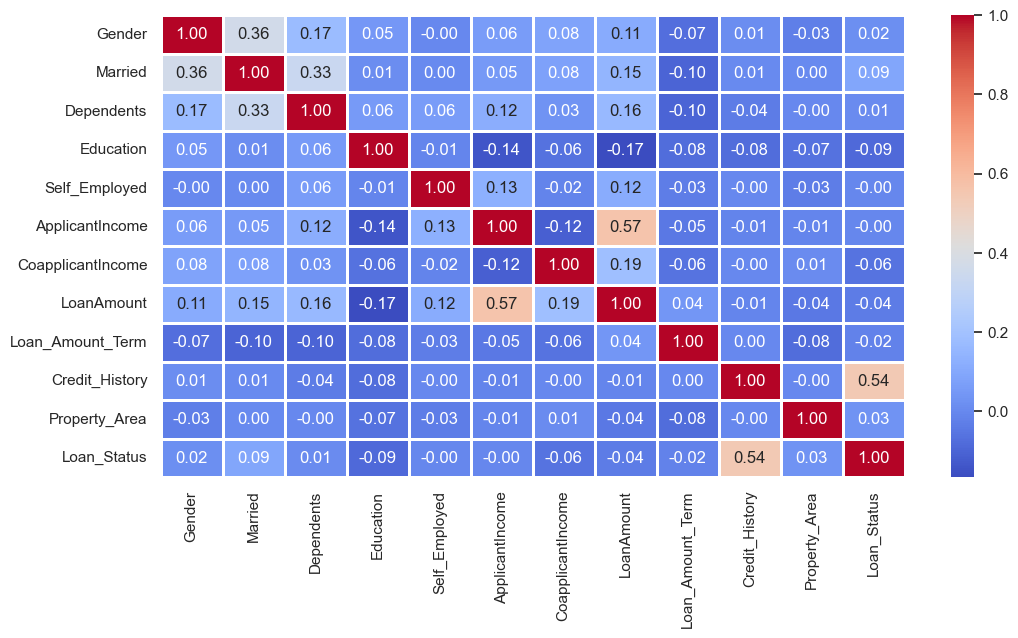

In [24]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(loan.corr(),cmap='coolwarm',fmt='.2f', 
            linewidths=2,annot=True)

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

In [21]:
# model train

from sklearn.model_selection import train_test_split 
  
X = loan.drop(['Loan_Status'],axis=1) 
Y = loan['Loan_Status'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, 
                                                    random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((368, 11), (246, 11), (368,), (246,))

In [22]:
# Evaluation
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
  
from sklearn import metrics 
  
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 
lc = LogisticRegression() 
  
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(Y_train,  
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 97.01086956521739
Accuracy score of  KNeighborsClassifier = 77.17391304347827
Accuracy score of  SVC = 70.38043478260869
Accuracy score of  LogisticRegression = 82.88043478260869


In [23]:
# making predictions on the testing set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", 
          clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(Y_test, 
                                     Y_pred))


Accuracy score of  RandomForestClassifier = 73.98373983739837
Accuracy score of  KNeighborsClassifier = 62.19512195121951
Accuracy score of  SVC = 67.07317073170732
Accuracy score of  LogisticRegression = 78.86178861788618
